In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os

# Chemin vers les données
input_dir = '/kaggle/input/oii-dataset/OII-DS'

"""
# Lister les dossiers et fichiers
for root, dirs, files in os.walk(input_dir):
    print(f"Dossier: {root}")
    for file in files:
        print(f" - {file}")
"""

'\n# Lister les dossiers et fichiers\nfor root, dirs, files in os.walk(input_dir):\n    print(f"Dossier: {root}")\n    for file in files:\n        print(f" - {file}")\n'

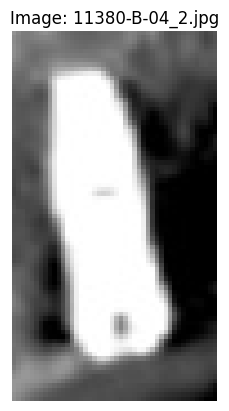

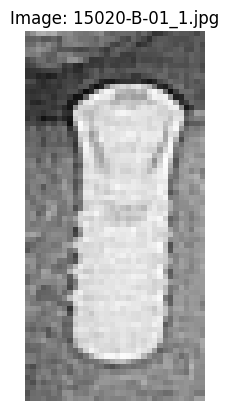

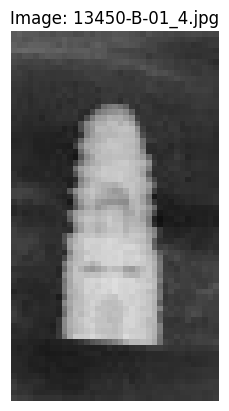

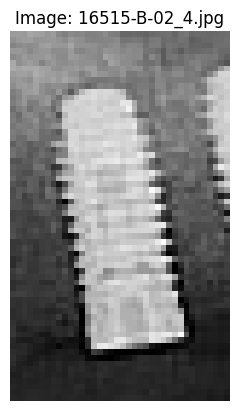

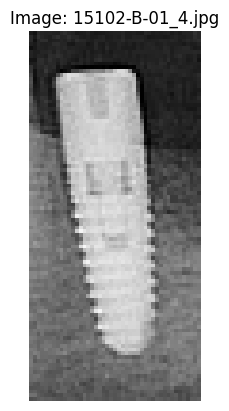

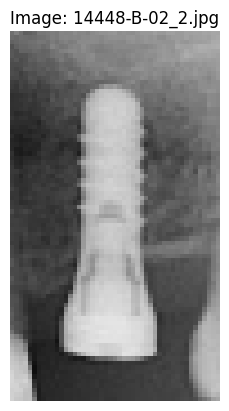

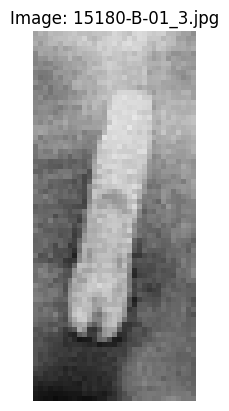

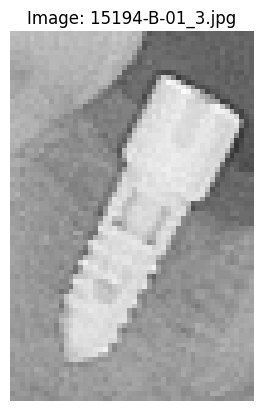

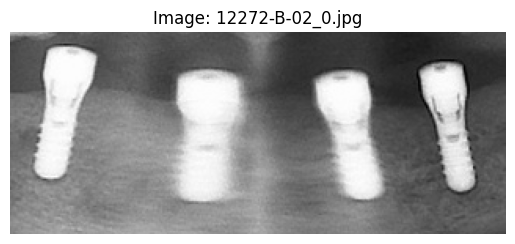

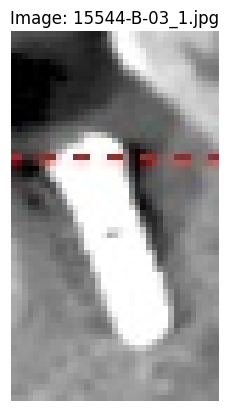

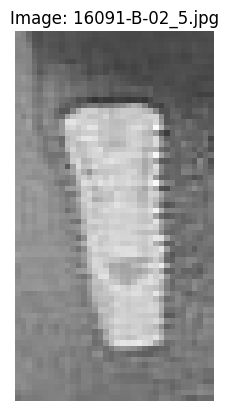

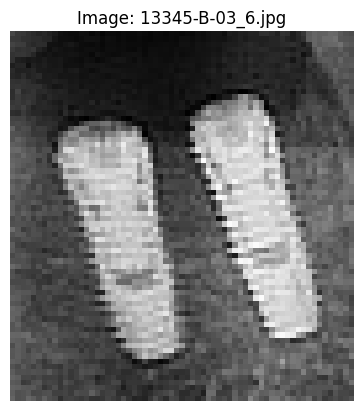

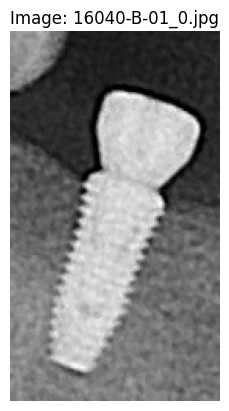

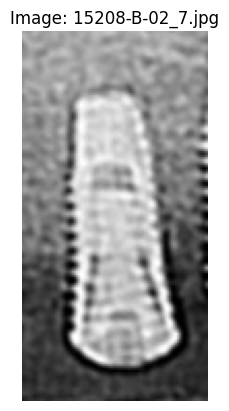

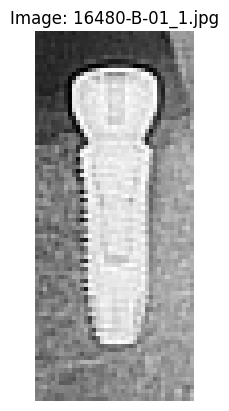

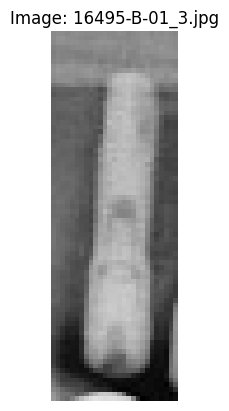

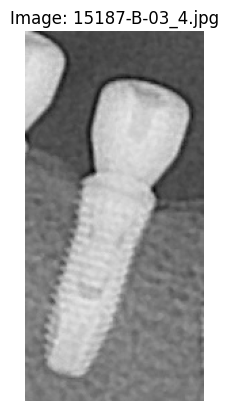

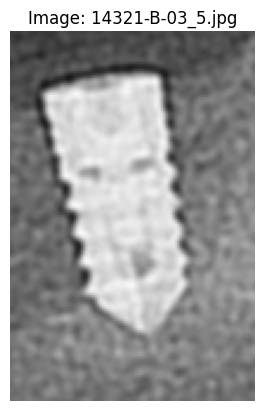

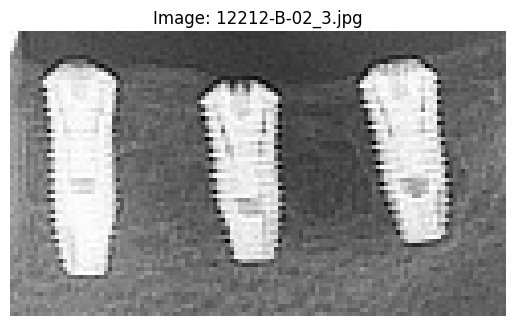

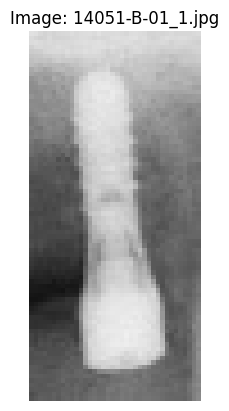

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

# Chemin vers un dossier d'images
image_dir = os.path.join(input_dir, 'Oral-Implant-image/single_implants')

# Charger et afficher quelques images
images = os.listdir(image_dir)
for img_file in images[:20]:  
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(f"Image: {img_file}")
    plt.axis('off')
    plt.show()


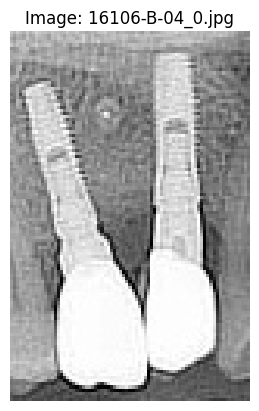

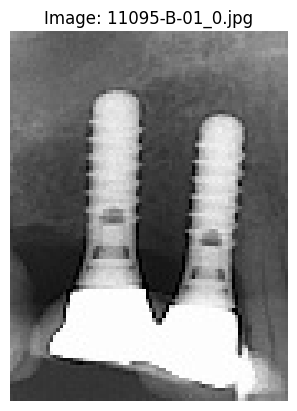

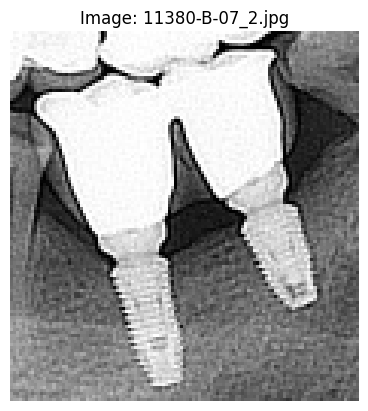

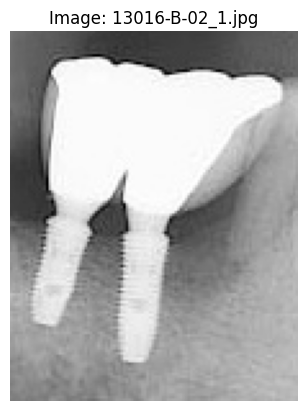

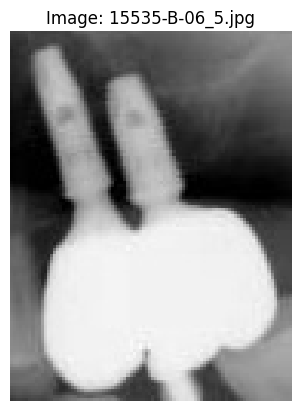

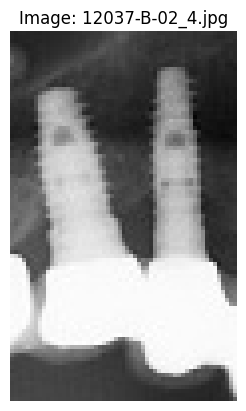

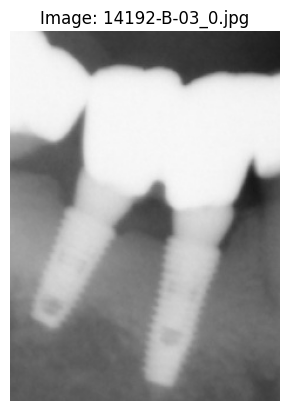

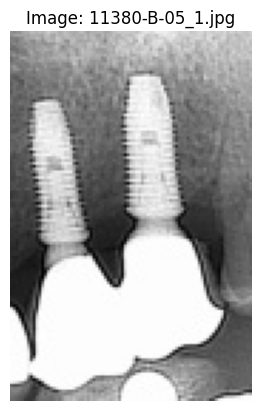

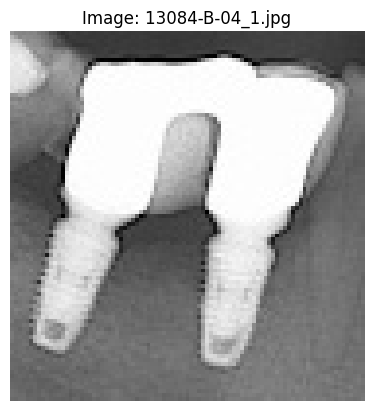

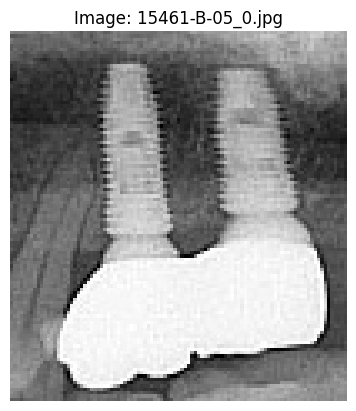

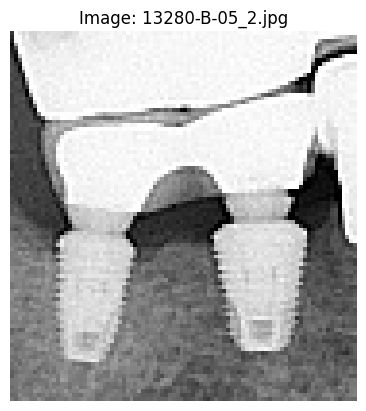

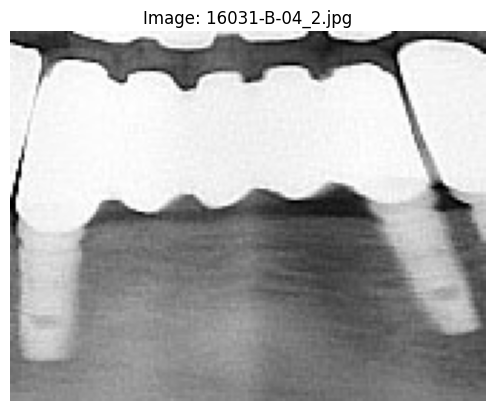

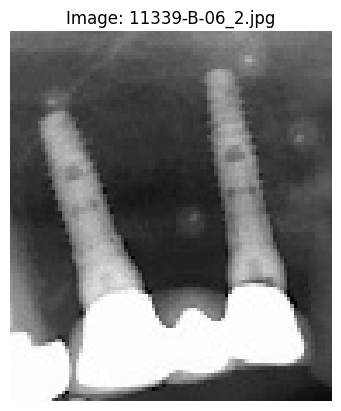

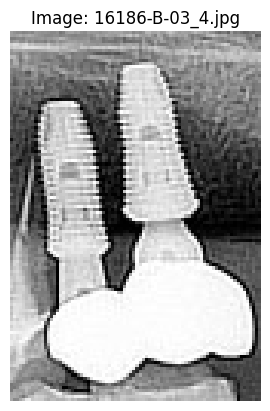

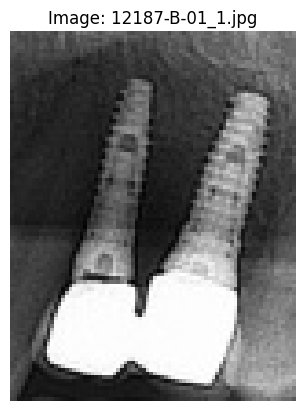

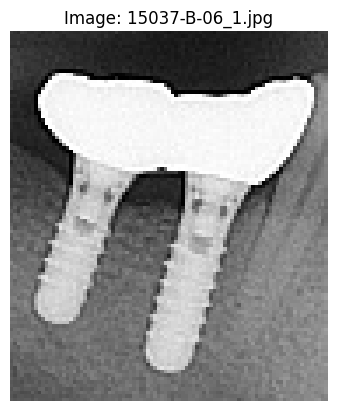

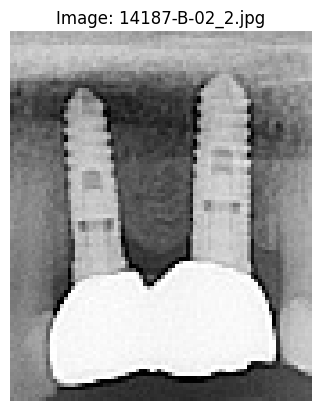

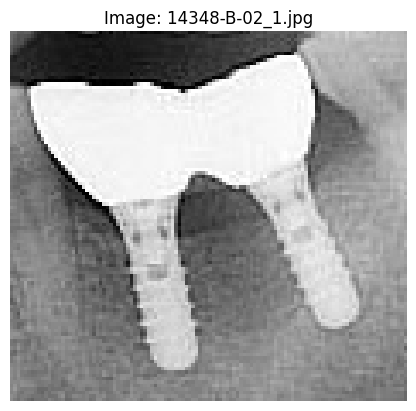

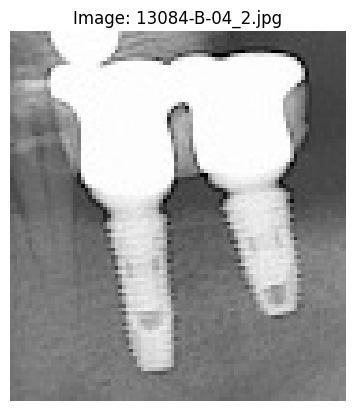

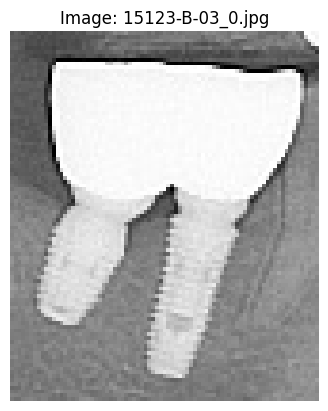

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

# Chemin vers un dossier d'images
image_dir = os.path.join(input_dir, 'Oral-Implant-image/double_implants')

# Charger et afficher quelques images
images = os.listdir(image_dir)
for img_file in images[:20]:  
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(f"Image: {img_file}")
    plt.axis('off')
    plt.show()

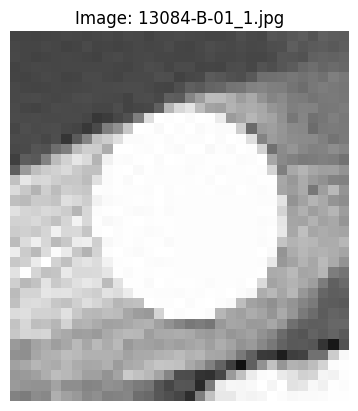

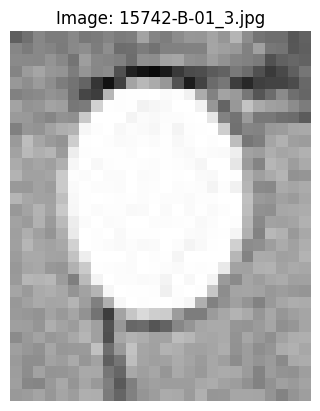

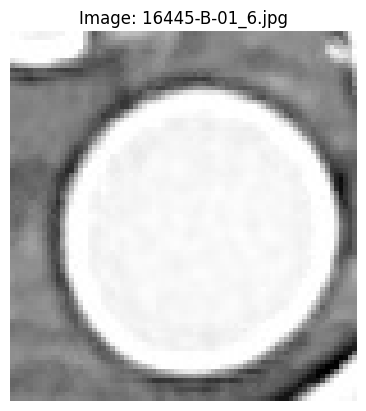

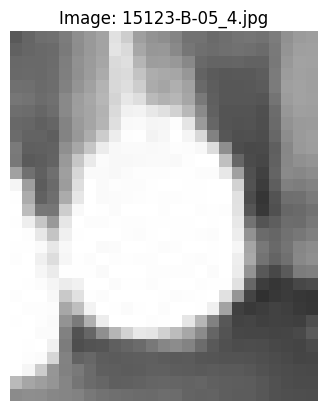

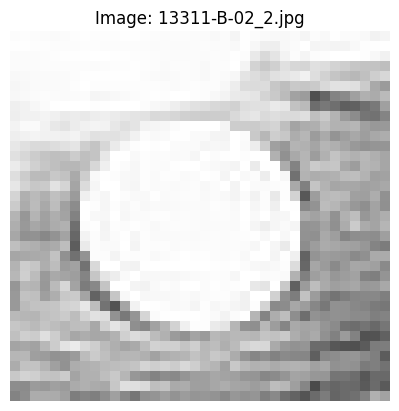

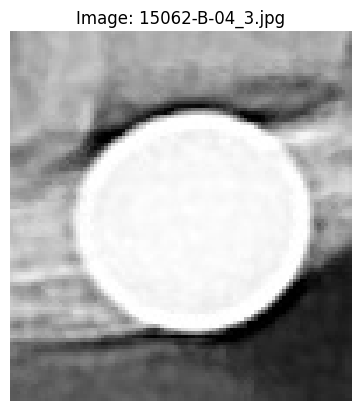

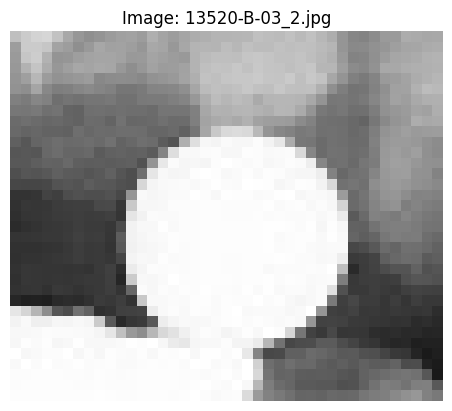

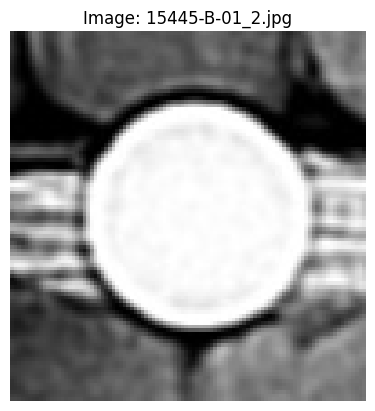

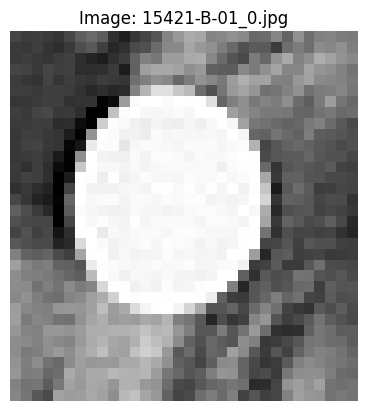

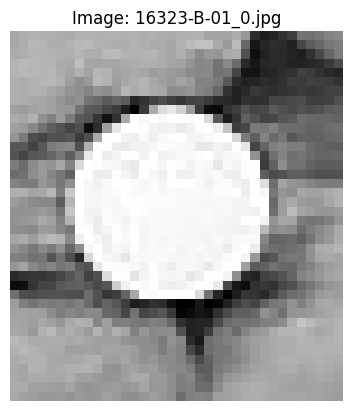

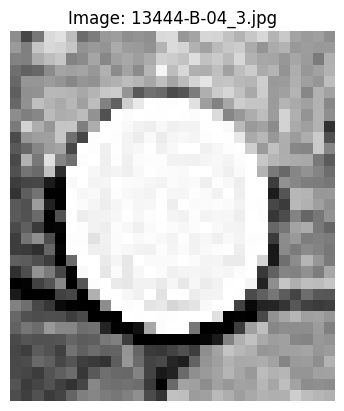

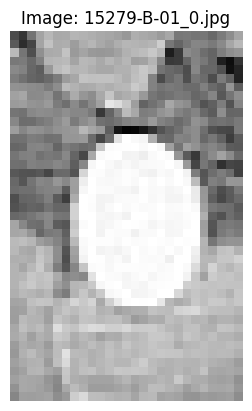

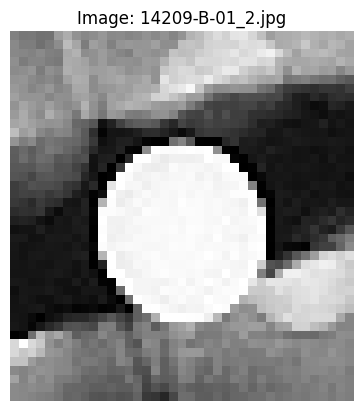

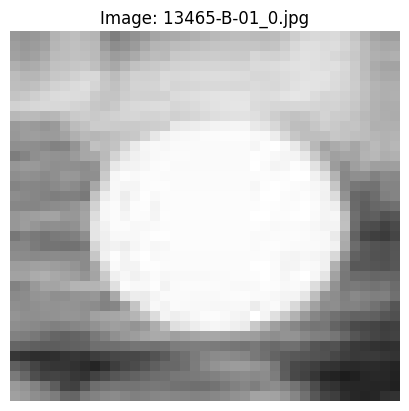

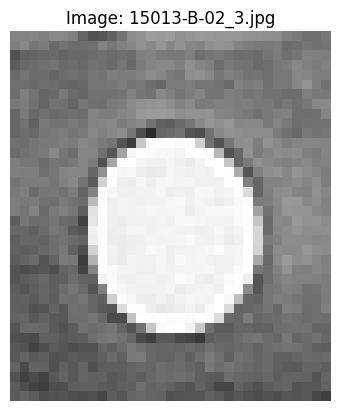

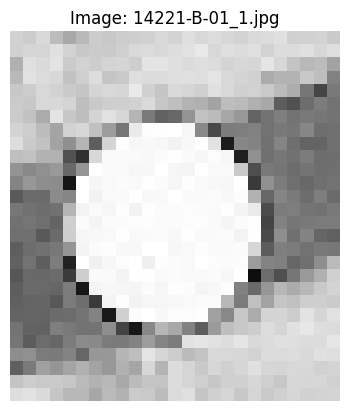

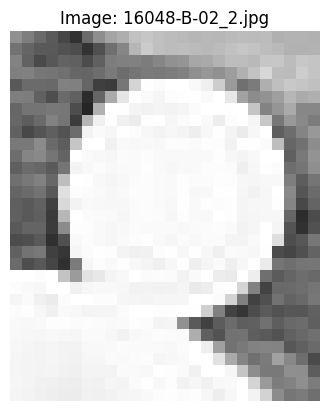

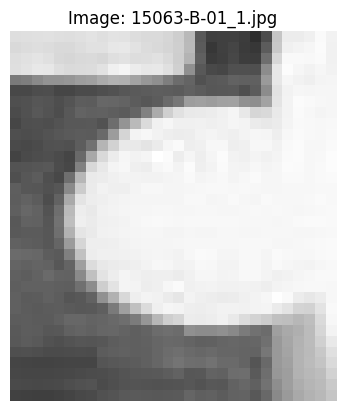

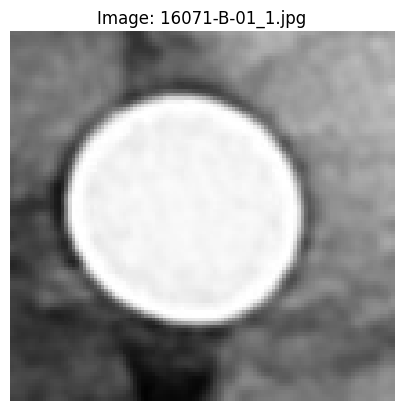

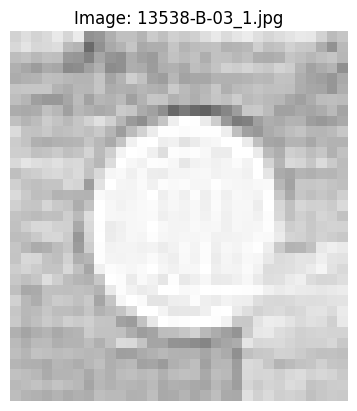

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

# Chemin vers un dossier d'images
image_dir = os.path.join(input_dir, 'Oral-Implant-image/steel_ball')

# Charger et afficher quelques images
images = os.listdir(image_dir)
for img_file in images[:20]:  
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(f"Image: {img_file}")
    plt.axis('off')
    plt.show()

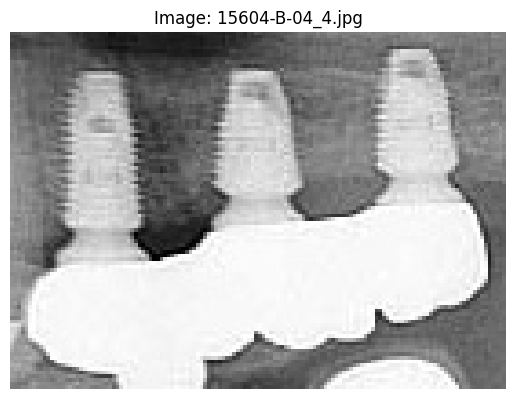

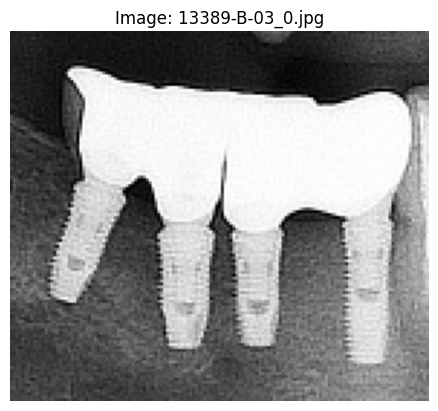

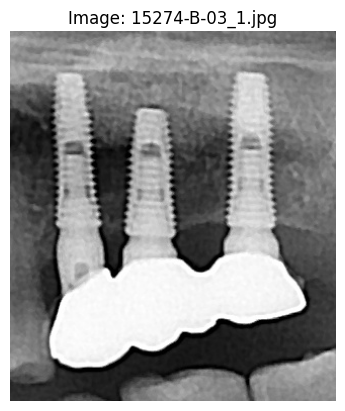

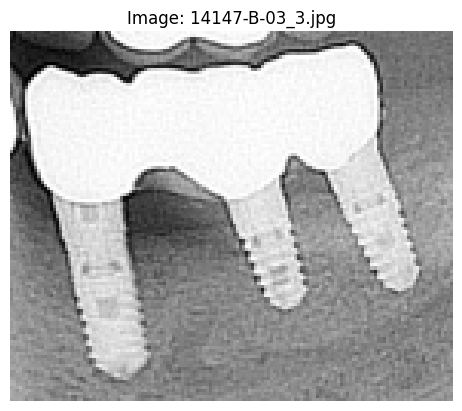

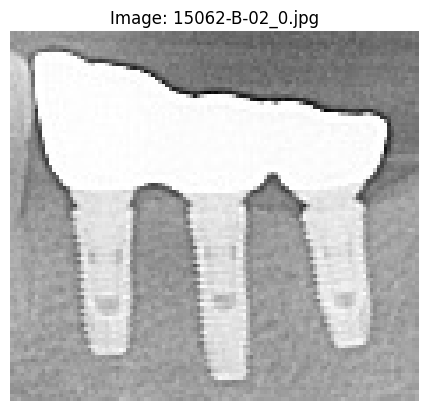

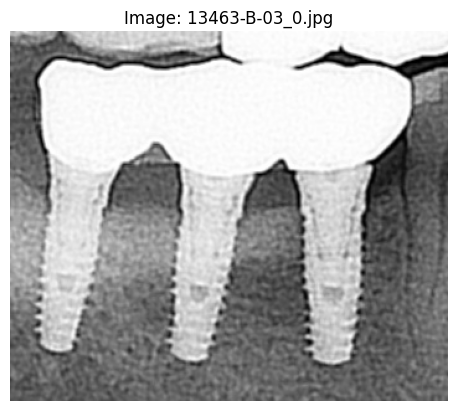

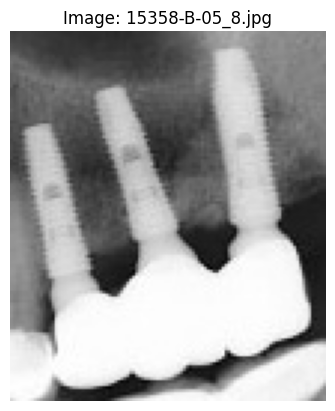

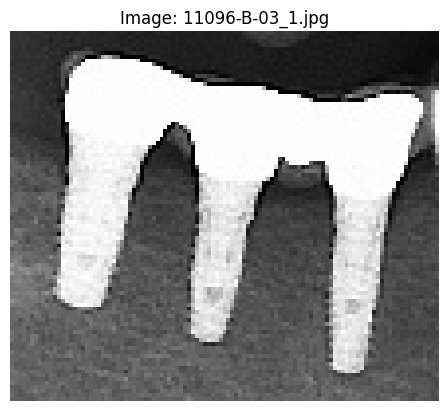

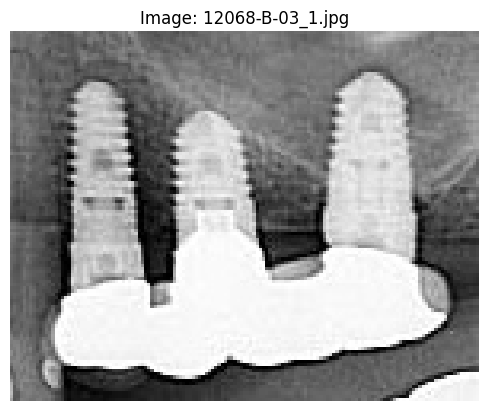

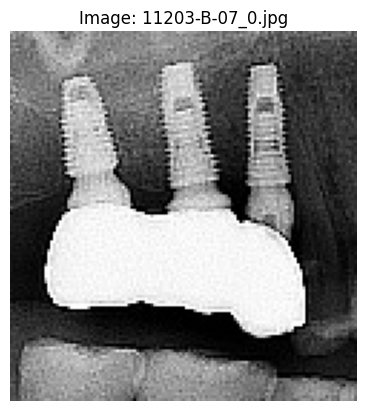

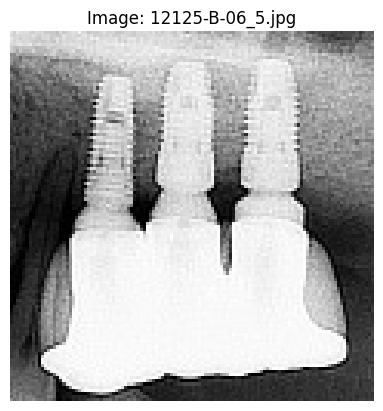

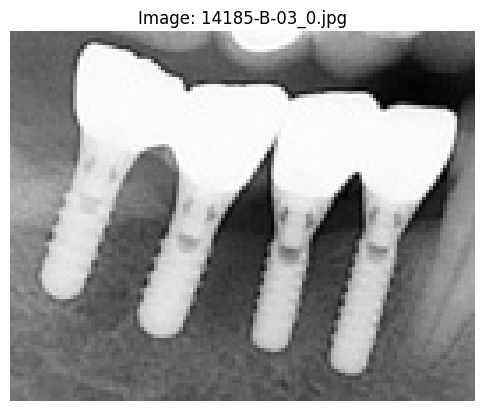

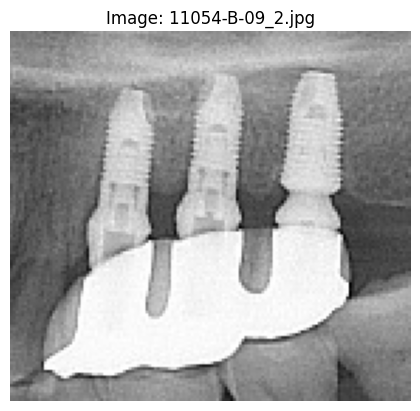

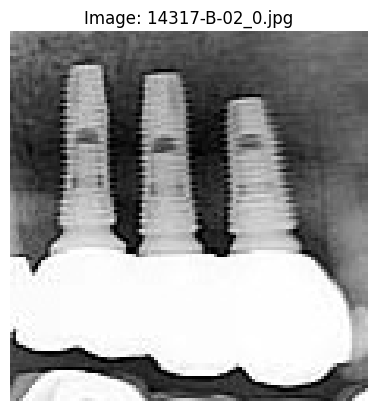

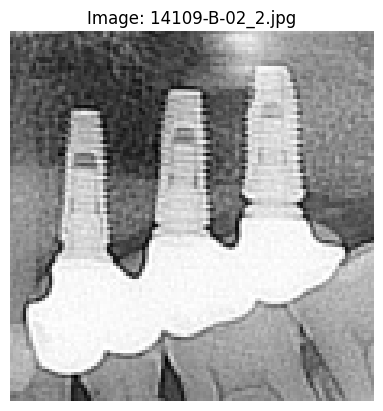

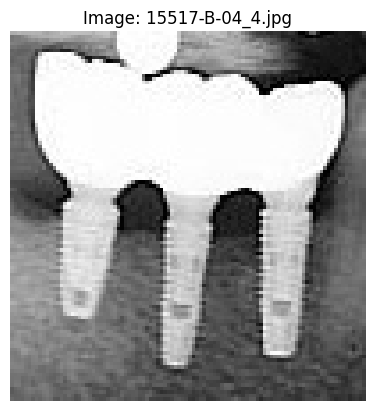

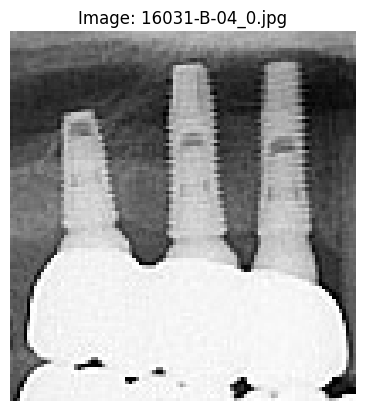

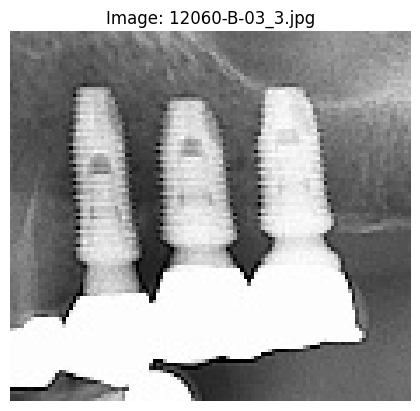

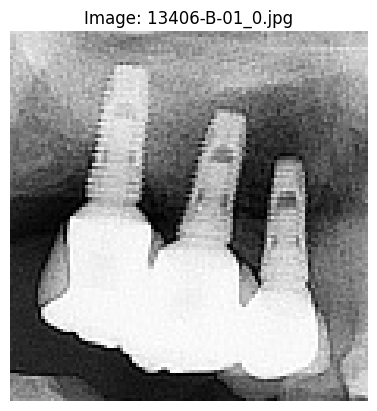

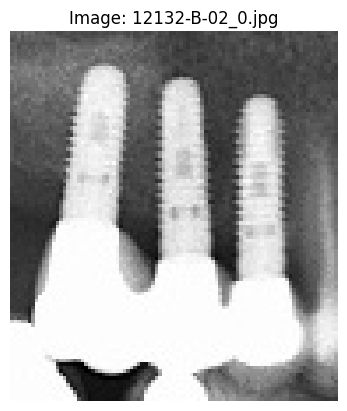

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# Chemin vers un dossier d'images
image_dir = os.path.join(input_dir, 'Oral-Implant-image/compound')

# Charger et afficher quelques images
images = os.listdir(image_dir)
for img_file in images[:20]:  
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(f"Image: {img_file}")
    plt.axis('off')
    plt.show()

compter le nbr total des imgs

In [7]:
categories = ['compound', 'double_implants', 'others', 'single_implants', 'steel_ball']
category_counts = {}

for category in categories:
    category_path = os.path.join(input_dir, f'Oral-Implant-image/{category}')
    category_counts[category] = len(os.listdir(category_path))

# Afficher la distribution
for category, count in category_counts.items():
    print(f"{category}: {count} images")


compound: 323 images
double_implants: 634 images
others: 5026 images
single_implants: 6616 images
steel_ball: 2641 images


savoir des dimentions des images

In [8]:
from PIL import Image

# Parcourir quelques images et vérifier leurs tailles
image_sizes = []
for img_file in os.listdir(image_dir)[:10]:  # Exemple sur 10 images
    img_path = os.path.join(image_dir, img_file)
    with Image.open(img_path) as img:
        image_sizes.append(img.size)

print(f"Dimensions des images: {set(image_sizes)}")


Dimensions des images: {(136, 98), (121, 129), (322, 366), (147, 116), (116, 105), (145, 121), (145, 128), (353, 298), (106, 124), (109, 94)}


Code ajusté pour filtrer les images dans toutes les catégories

In [9]:
from PIL import Image
import os

# Chemin vers la racine du dataset
base_dir = '/kaggle/input/oii-dataset/OII-DS/Oral-Implant-image'
categories = ['compound', 'double_implants', 'others', 'single_implants', 'steel_ball']

# Résultats par catégorie
valid_images = {}
invalid_images = {}

for category in categories:
    category_path = os.path.join(base_dir, category)
    valid_images[category] = []
    invalid_images[category] = []
    
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        try:
            with Image.open(img_path) as img:
                img.verify()  # Vérifie si l'image est valide
            valid_images[category].append(img_file)
        except Exception as e:
            invalid_images[category].append(img_file)
    
    print(f"Catégorie: {category}")
    print(f" - Images valides: {len(valid_images[category])}")
    print(f" - Images invalides: {len(invalid_images[category])}")

# Résumé global
print("\nRésumé global :")
for category in categories:
    print(f"{category}: {len(valid_images[category])} valides, {len(invalid_images[category])} invalides")


Catégorie: compound
 - Images valides: 323
 - Images invalides: 0
Catégorie: double_implants
 - Images valides: 634
 - Images invalides: 0
Catégorie: others
 - Images valides: 5026
 - Images invalides: 0
Catégorie: single_implants
 - Images valides: 6616
 - Images invalides: 0
Catégorie: steel_ball
 - Images valides: 2641
 - Images invalides: 0

Résumé global :
compound: 323 valides, 0 invalides
double_implants: 634 valides, 0 invalides
others: 5026 valides, 0 invalides
single_implants: 6616 valides, 0 invalides
steel_ball: 2641 valides, 0 invalides


Redimensionnement des images

In [10]:
from PIL import Image
import os

# Chemin vers les images
output_dir = '/kaggle/working/resized_images'
os.makedirs(output_dir, exist_ok=True)

# Redimensionnement des images par catégorie
for category in categories:
    category_path = os.path.join(base_dir, category)
    output_category_dir = os.path.join(output_dir, category)
    os.makedirs(output_category_dir, exist_ok=True)
    
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        output_path = os.path.join(output_category_dir, img_file)
        
        with Image.open(img_path) as img:
            img_resized = img.resize((224, 224))  # Taille fixe
            img_resized.save(output_path)

print("Redimensionnement terminé pour toutes les catégories.")


Redimensionnement terminé pour toutes les catégories.


Code pour afficher quelques exemples d'images redimensionnées

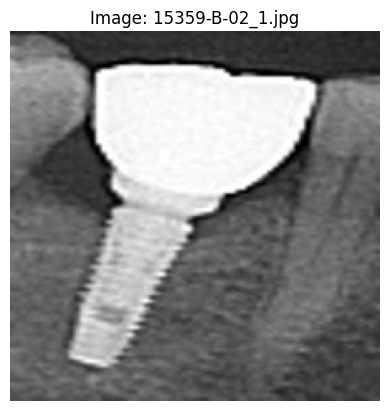

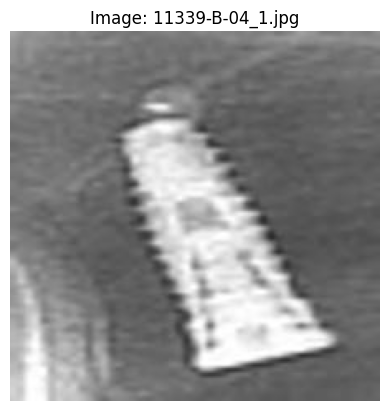

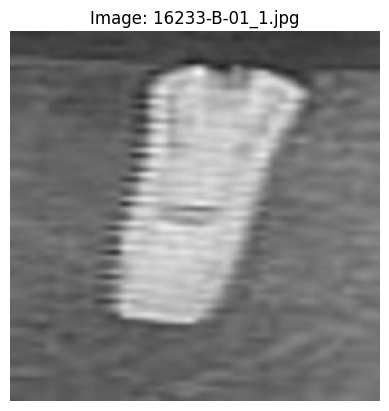

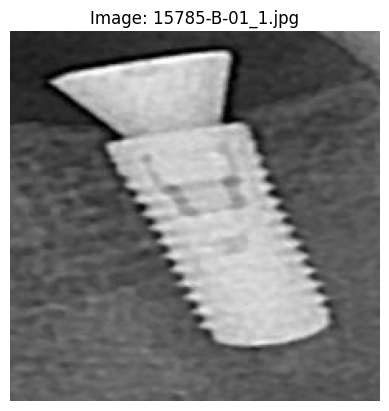

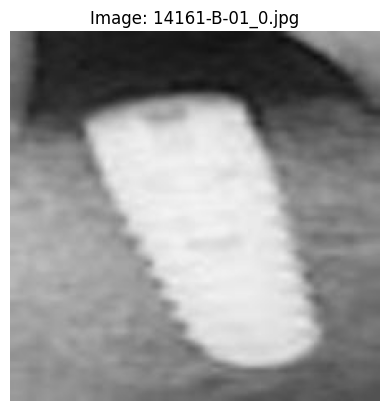

In [11]:
import matplotlib.pyplot as plt

# Exemple d'affichage pour une catégorie
example_category = 'single_implants'
example_dir = os.path.join(output_dir, example_category)

example_images = os.listdir(example_dir)[:5]  # Afficher 5 images
for img_file in example_images:
    img_path = os.path.join(example_dir, img_file)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Image: {img_file}")
    plt.axis('off')
    plt.show()


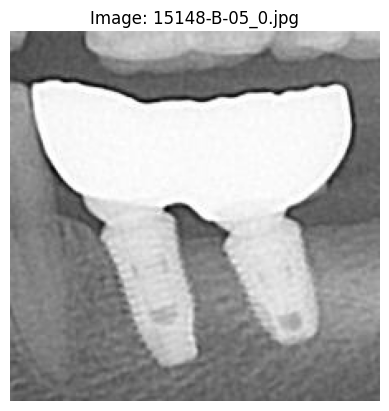

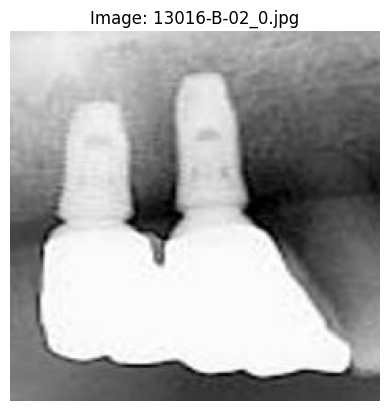

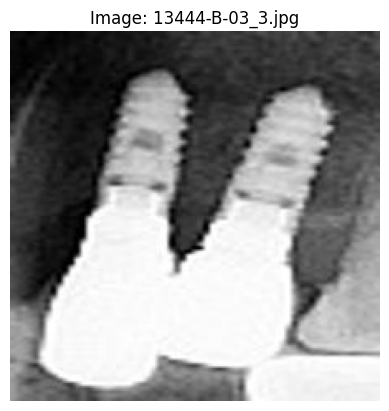

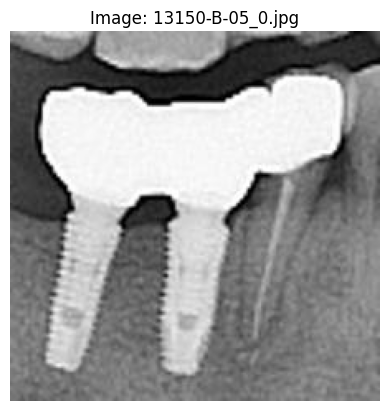

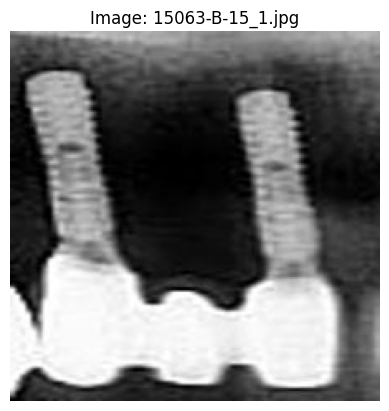

In [12]:
import matplotlib.pyplot as plt

# Exemple d'affichage pour une catégorie
example_category = 'double_implants'
example_dir = os.path.join(output_dir, example_category)

example_images = os.listdir(example_dir)[:5]  # Afficher 5 images
for img_file in example_images:
    img_path = os.path.join(example_dir, img_file)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Image: {img_file}")
    plt.axis('off')
    plt.show()


**implémentation d'un CNN******

In [13]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


 Préparer le dataset

In [14]:
base_dir = '/kaggle/working/resized_images'
categories = ['compound', 'double_implants', 'others', 'single_implants', 'steel_ball']

# Charger les images et leurs labels
data = []
labels = []

for label, category in enumerate(categories):
    category_path = os.path.join(base_dir, category)
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        img = Image.open(img_path).resize((224, 224))  # Redimensionnement à 224x224
        data.append(np.array(img))
        labels.append(label)

# Convertir en array numpy
data = np.array(data) / 255.0  # Normalisation
labels = np.array(labels)


Diviser le dataset en ensembles d’entraînement, validation, et test

In [15]:
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Entraînement: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")


 Construire le modèle CNN

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Pour éviter le surapprentissage
    Dense(len(categories), activation='softmax')  # Nombre de catégories
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Entraîner le modèle

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow(X_train, y_train, batch_size=32)


In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=(X_val, y_val),
                    steps_per_epoch=len(X_train) // 32,
                    validation_steps=len(X_val) // 32)


Évaluer le modèle

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Sauvegarder le modèle

In [ ]:
model.save('/kaggle/working/cnn_dental_implant_model.h5')
print("Modèle sauvegardé !")


Visualiser les résultats

In [ ]:
import matplotlib.pyplot as plt

# Précision
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Précision')
plt.show()

# Perte
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Perte')
plt.show()
